### LAB4: Machine learning - Một số thuật toán cơ bản của học máy

### 1.Linear Regerssion

#### Biết: HỒI QUY TUYẾN TÍNH LÀ DỰ ĐOÁN GIÁ TRỊ LIÊN TỤC DỰA TRÊN MỘT HOẶC NHIỀU BIẾN ĐỘC LẬP

MSE: 0.56
R^2: 0.58


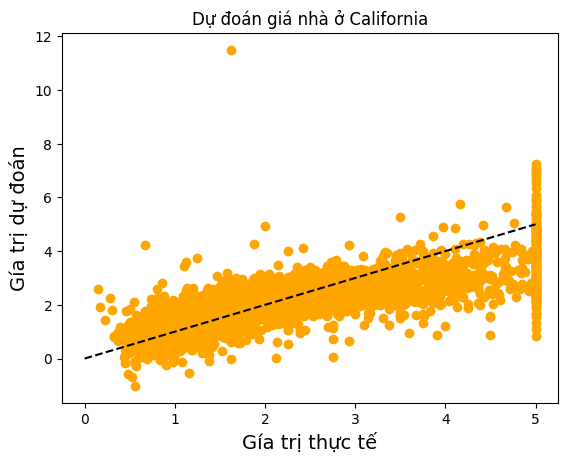

In [19]:
# Sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu fetch california housing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

cali = fetch_california_housing()
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)
# Chia tập dữ liệu có 80% huấn liện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)
# Dự đoán giá nhà
y_pred = model.predict(X_test)
# Đánh giá mô hình
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('R^2: %.2f' % r2_score(y_test, y_pred))
# Vẽ biểu đồ
plt.scatter(y_test, y_pred, color="orange")
plt.xlabel('Gía trị thực tế', fontsize=14)
plt.ylabel('Gía trị dự đoán', fontsize=14)
plt.title('Dự đoán giá nhà ở California')
# đường hồi quy
plt.plot([0, 5], [0, 5], '--k')
plt.show()



### Bài tập ứng dụng

MSE: 8.57
R^2: 0.57


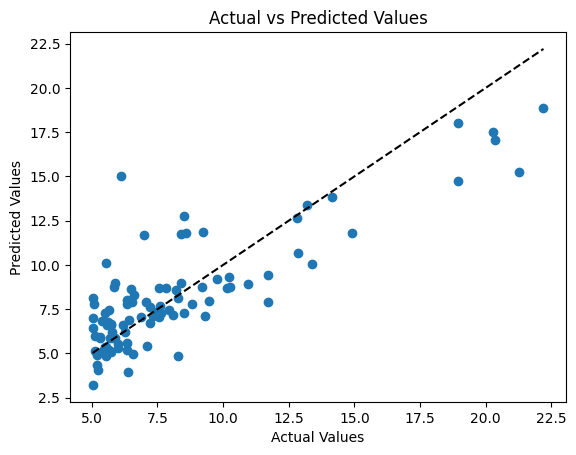

In [20]:
#Sử dụng linear regression dự đoán giá trị của datalab4.txt ở cột thứ 2 và trực quan hóa dữ liệu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Đọc dữ liệu từ file
df = pd.read_csv('datalab4.csv')

# Tách biến độc lập (X) và biến phụ thuộc (y)
X = pd.DataFrame(df["x"])
y = pd.DataFrame(df["y"])
# Chia tập dữ liệu thành 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình và huấn luyện
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá trị
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

# Plot the results for all data
y_all_pred = model.predict(X)
plt.scatter(y, y_all_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.axis('tight') 
plt.show()



In [21]:
# Hồi quy logistic
# Phân loại nhị phân hoặc đa lớp dựa trên các đặc trưng

Confusion Matrix:
[[53  1]
 [ 2 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



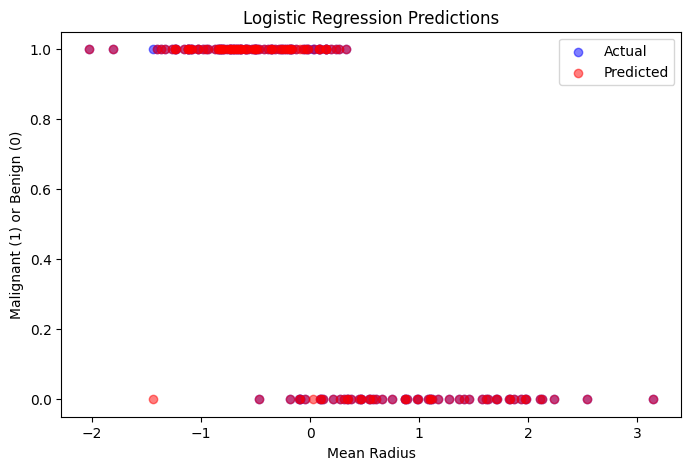

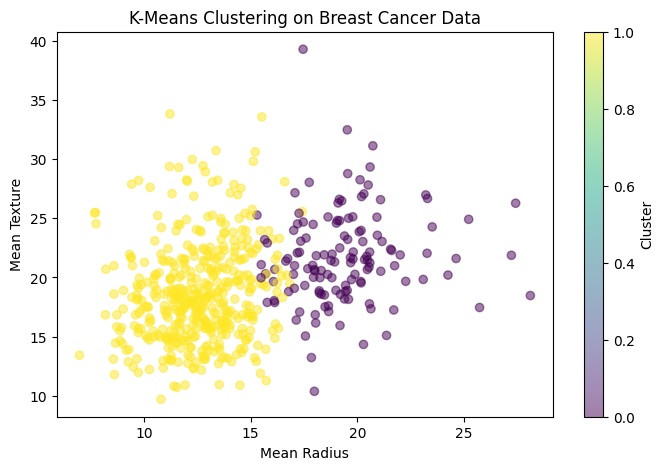

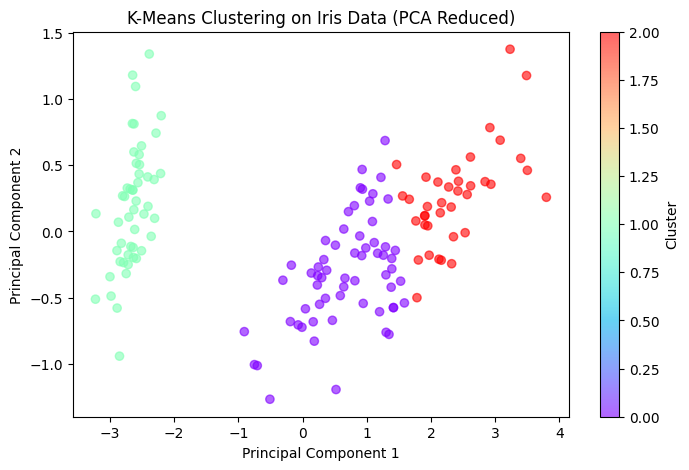

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Load dữ liệu breast cancer
df = load_breast_cancer()
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Series(df.target)

# Chia tập dữ liệu (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng & huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Trực quan hóa kết quả dự đoán
mean_radius_index = list(df.feature_names).index('mean radius')

plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, mean_radius_index], y_test, alpha=0.5, label="Actual", color="blue")
plt.scatter(X_test[:, mean_radius_index], y_pred, alpha=0.5, label="Predicted", color="red")
plt.xlabel("Mean Radius")
plt.ylabel("Malignant (1) or Benign (0)")
plt.title("Logistic Regression Predictions")
plt.legend()
plt.show()

# Phân cụm K-Means trên breast cancer dataset
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Trực quan hóa phân cụm
plt.figure(figsize=(8, 5))
plt.scatter(X["mean radius"], X["mean texture"], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("K-Means Clustering on Breast Cancer Data")
plt.colorbar(label="Cluster")
plt.show()

# Load dữ liệu iris để phân cụm
iris = datasets.load_iris()
X_iris = iris.data  # Có 4 đặc trưng
y_iris = iris.target  # Nhãn để so sánh

# Áp dụng K-Means với số cụm là 3
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_iris.fit(X_iris)
y_kmeans_iris = kmeans_iris.predict(X_iris)  # Dự đoán nhãn của các cụm

# Giảm chiều dữ liệu xuống 2D để trực quan hóa với PCA giải thích
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_iris, cmap='rainbow', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on Iris Data (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()


Accuracy: 0.8388
Confusion Matrix:
 [[605   5]
 [113   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.64      0.07      0.13       122

    accuracy                           0.84       732
   macro avg       0.74      0.53      0.52       732
weighted avg       0.81      0.84      0.78       732



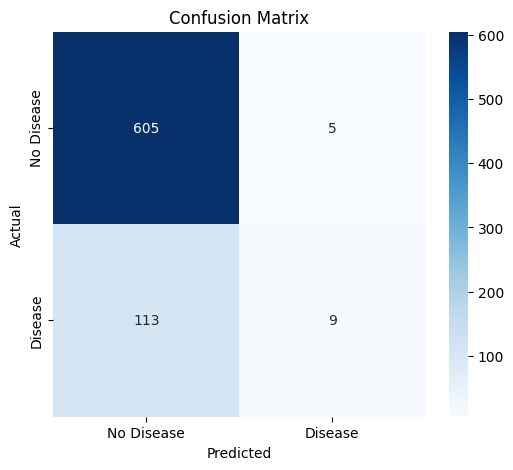

In [23]:
#BTVN:

# 1.Cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logistic.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Đọc dữ liệu
df = pd.read_csv("framingham.csv")
df = df.dropna()

# Loại bỏ các hàng có giá trị NaN trong các cột đặc trưng và nhãn
features = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df = df.dropna(subset=features + ['TenYearCHD'])
# Chọn các cột đặc trưng và nhãn
X = df[features]
y = df['TenYearCHD']
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)
# Vẽ heatmap cho ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScal

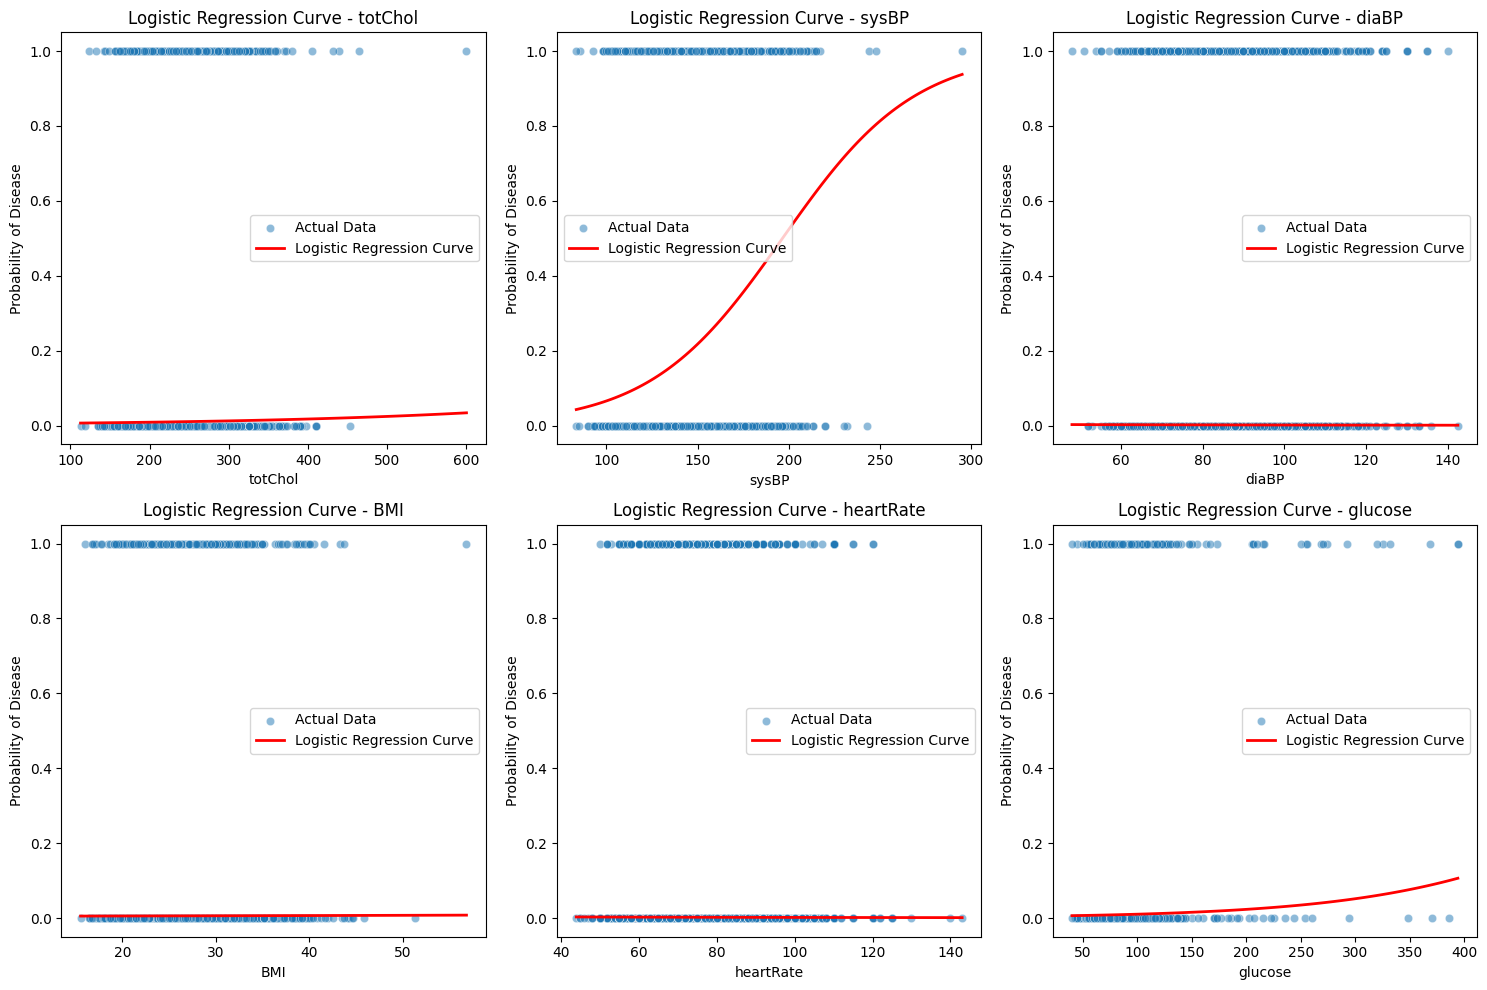

In [24]:
features_to_plot = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    x_vals = np.linspace(df[feature].min(), df[feature].max(), 100).reshape(-1, 1)
    x_scaled = scaler.transform(np.column_stack([np.zeros_like(x_vals) if f != feature else x_vals for f in features]))
    y_probs = model.predict_proba(x_scaled)[:, 1]

    sns.scatterplot(x=df[feature], y=df['TenYearCHD'], alpha=0.5, label='Actual Data')
    plt.plot(x_vals, y_probs, color='red', linewidth=2, label='Logistic Regression Curve')
    plt.xlabel(feature)
    plt.ylabel('Probability of Disease')
    plt.title(f'Logistic Regression Curve - {feature}')
    plt.legend()

plt.tight_layout()
plt.show()


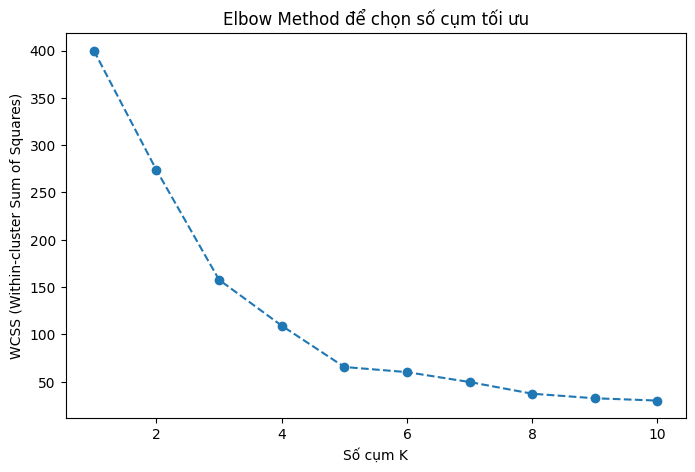

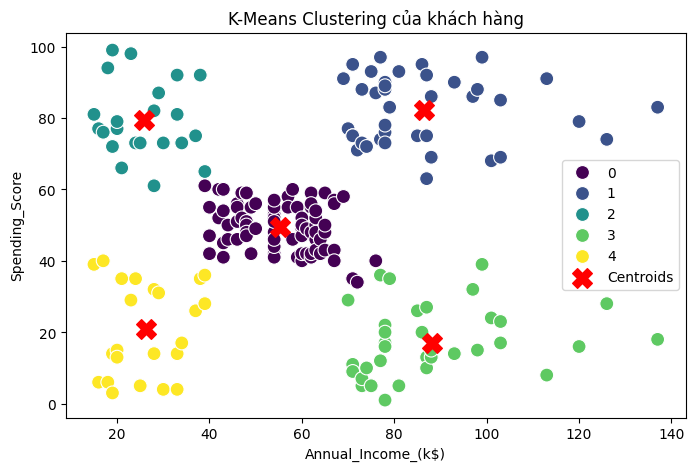

In [25]:
# 2. Ứng dụng học toán phân cụm K mean cho tập dữ liệu customer data , you can get in kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Đọc tệp dữ liệu
df = pd.read_csv("customer.csv")
X = df[['Annual_Income_(k$)', 'Spending_Score']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Sử dụng phương pháp Elbow để tìm số cụm tốt nhất
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Tổng bình phương khoảng cách trong cụm

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Số cụm K")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.title("Elbow Method để chọn số cụm tối ưu")
plt.show()
# Huấn luyện mô hình K-Means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Income_(k$)'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=200, c='red', label='Centroids', marker='X')
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("K-Means Clustering của khách hàng")
plt.legend()
plt.show()


In [27]:
# 3. Tìm hiểm về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn ( khuyến nghị: Precision, Recall, crc)

# Tổng cộng các bạn sẽ có 3 bài lớn và 4 bài nhỏ cho homework



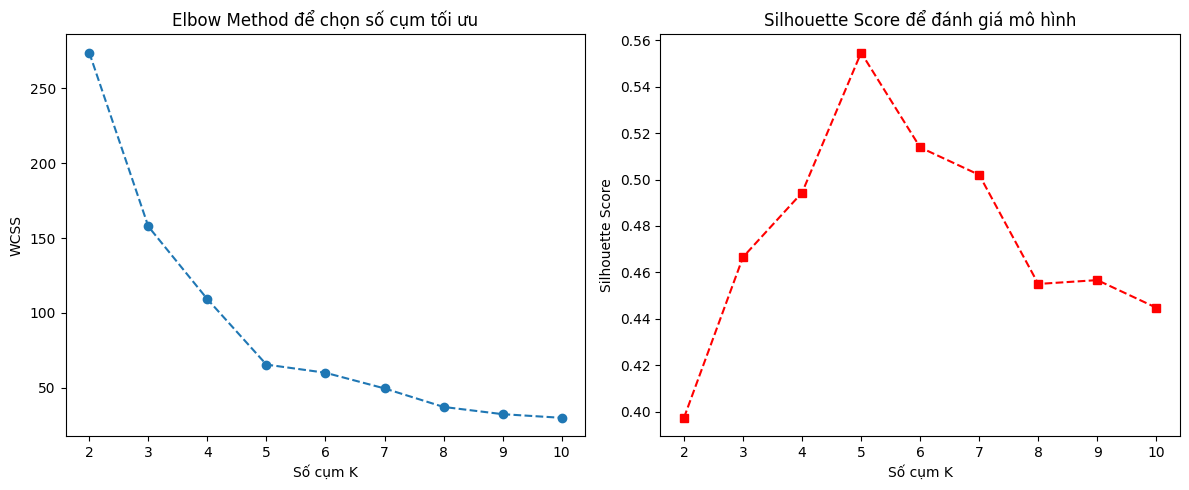

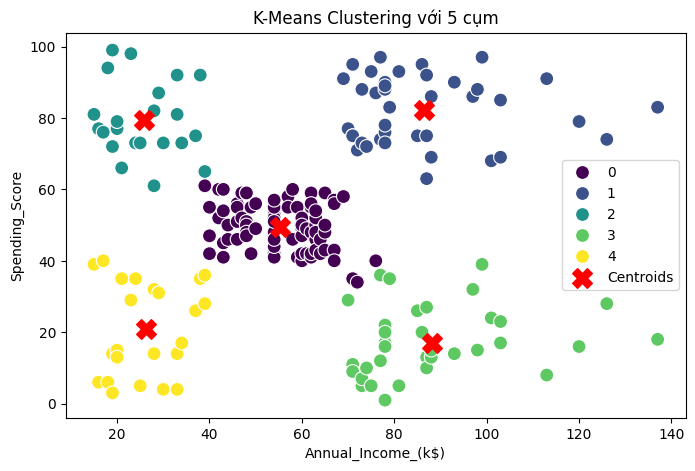

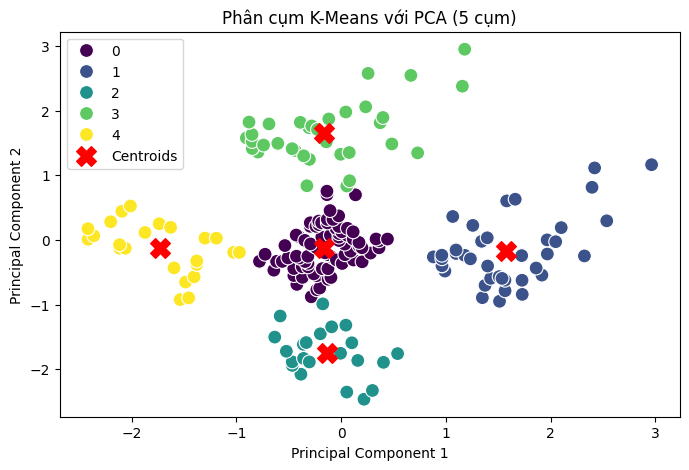